# **Métricas de Evaluación** en Clasificación

## Matriz de Confusión

La **matriz de confusión** es una herramienta clave para evaluar el rendimiento de un modelo de clasificación. Se utiliza para comparar las predicciones realizadas por el modelo con los valores reales en un conjunto de datos de prueba. Vamos a explicar como se organiza:

### Estructura de la matriz de confusión

Para un problema de **clasificación binaria** (dos clases), la matriz de confusión es una tabla de 2x2 que organiza los resultados de las predicciones en cuatro categorías:

1. **Verdaderos Positivos (VP)**: Son los casos en los que el modelo predijo correctamente la clase positiva.
2. **Falsos Positivos (FP)**: Son los casos en los que el modelo predijo la clase positiva incorrectamente (cuando en realidad era negativa). A esto también se le llama "error tipo I".
3. **Verdaderos Negativos (VN)**: Son los casos en los que el modelo predijo correctamente la clase negativa.
4. **Falsos Negativos (FN)**: Son los casos en los que el modelo predijo la clase negativa incorrectamente (cuando en realidad era positiva). Esto se conoce como "error tipo II".

### Ejemplo

|                 | **Predicción Positiva** | **Predicción Negativa** |
|-----------------|-------------------------|-------------------------|
| **Clase Positiva**  | Verdaderos Positivos (VP)  | Falsos Negativos (FN)   |
| **Clase Negativa**  | Falsos Positivos (FP)      | Verdaderos Negativos (VN)|



### Métricas derivadas de la matriz de confusión

A partir de la matriz de confusión, se pueden calcular varias métricas importantes:

1. **Exactitud (Accuracy)**: Es el porcentaje de predicciones correctas (tanto positivas como negativas) sobre el total de predicciones.
   $$
   \text{Exactitud} = \frac{VP + VN}{VP + VN + FP + FN}
   $$

2. **Precisión (Precision)**: Es la proporción de predicciones positivas correctas respecto al total de predicciones positivas. Indica la calidad de las predicciones positivas.
   $$
   \text{Precisión} = \frac{VP}{VP + FP}
   $$

3. **Sensibilidad o Recall (Tasa de Verdaderos Positivos)**: Es la proporción de casos positivos correctamente identificados. Mide la capacidad del modelo para detectar la clase positiva.
   $$
   \text{Sensibilidad} = \frac{VP}{VP + FN}
   $$

4. **Especificidad (Specificity)**: Es la proporción de casos negativos correctamente identificados. Mide la capacidad del modelo para detectar la clase negativa.
   $$
   \text{Especificidad} = \frac{VN}{VN + FP}
   $$

5. **F1-Score**: Es una media armónica entre la precisión y la sensibilidad. Se usa cuando hay un balance desigual entre las clases o cuando se busca un equilibrio entre precisión y recall.
   $$
   F1 = 2 \times \frac{\text{Precisión} \times \text{Sensibilidad}}{\text{Precisión} + \text{Sensibilidad}}
   $$


## 1. **Precision** (Precisión)

La **precisión** mide la proporción de verdaderos positivos sobre el total de ejemplos predichos como positivos (verdaderos positivos + falsos positivos). Es decir, de todos los elementos que fueron clasificados como positivos, cuántos realmente lo son.

$$
\text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Positives (FP)}}
$$

- **Alta precisión** significa que pocos ejemplos negativos han sido clasificados incorrectamente como positivos.
- Se utiliza en situaciones donde los falsos positivos son más costosos o críticos que los falsos negativos.


## 2. **Recall** (Sensibilidad o Tasa de Verdaderos Positivos)

El **recall** mide la proporción de verdaderos positivos sobre el total de ejemplos que realmente son positivos (verdaderos positivos + falsos negativos). Es decir, de todos los ejemplos positivos que existen, cuántos fueron clasificados correctamente.

$$
\text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}}
$$

- **Alto recall** significa que se ha identificado la mayoría de los verdaderos positivos.
- Es importante en escenarios donde los falsos negativos son más costosos que los falsos positivos.


## 3. **F1-Score**

El **F1-Score** es la media armónica entre precision y recall. Se utiliza cuando hay un equilibrio entre la precisión y la sensibilidad, y se busca un solo valor que las combine.

$$
\text{F1-score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

- Un **F1-score** alto indica un buen balance entre precisión y recall.
- Es útil cuando las clases están desbalanceadas y se requiere tomar en cuenta tanto los falsos positivos como los falsos negativos.


## 4. **Accuracy (Exactitud)**

La **exactitud** mide la proporción de predicciones correctas sobre el total de ejemplos.

$$
\text{Accuracy} = \frac{\text{True Positives (TP)} + \text{True Negatives (TN)}}{\text{Total de ejemplos (TP + TN + FP + FN)}}
$$

- La **accuracy** es útil cuando las clases están equilibradas, pero puede ser engañosa en casos con clases desbalanceadas, ya que un modelo que siempre predice la clase mayoritaria puede tener una accuracy alta.


## 5. **Macro Average** (Promedio Macro)

El **macro average** calcula la media aritmética de precision, recall y F1-score para cada clase de manera individual y luego toma el promedio sin tener en cuenta el tamaño de cada clase.

$$
\text{Macro Avg} = \frac{\text{Precision}_1 + \text{Precision}_2 + \dots + \text{Precision}_N}{N}
$$
$$
\text{(y similar para Recall y F1-score)}
$$

- Da igual importancia a todas las clases, independientemente de su tamaño.
- Útil en casos donde las clases están desbalanceadas y se quiere tener una visión equitativa del rendimiento en todas las clases.


## 6. **Weighted Average** (Promedio Ponderado)

El **weighted average** calcula la media de precision, recall y F1-score, ponderada por el número de ejemplos de cada clase. Es decir, da más peso a las clases con más ejemplos.

$$
\text{Weighted Avg} = \frac{\sum_{i=1}^{N} \text{Precision}_i \times \text{n}_i}{\sum_{i=1}^{N} \text{n}_i}
$$
$$
\text{(y similar para Recall y F1-score)}
$$

- Refleja mejor el rendimiento general del modelo, especialmente en datasets desbalanceados, ya que considera la proporción de ejemplos de cada clase.

#  **Clasificación Binaria**

## **Logistic Regression** (Regresión Logística)

### Ejemplo con dataset Iris

In [16]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

np.set_printoptions(linewidth=130)

In [19]:
iris = load_iris()  # Cargar el conjunto de datos

X = iris.data       # los features
y = iris.target     # el target

print("X:", "\n", X[:5], "\n")   # muestra de los features
print("y:", "\n", y)   # los posibles target

X: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]] 

y: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [20]:
# Convertir en un problema de clasificación binaria (ej: clases 0 vs 1)
# Nos quedamos solo con las clases 0 y 1 para hacer la clasificación binaria
binary_mask = y < 2
X_binary = X[binary_mask]
y_binary = y[binary_mask]

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42)

# Crear el clasificador
clf = LogisticRegression()

# Entrenar el modelo
clf.fit(X_train, y_train)

# Realizar predicciones
y_pred = clf.predict(X_test)

Generar la matriz de confusión y calcular las métricas


In [24]:
# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Mostrar las métricas
print()
print(f"Exactitud (Accuracy):  { accuracy }")
print(f"Precisión (Precision): { precision }")
print(f"Recall (Sensibilidad): { recall }")
print(f"F1 Score:              { f1 }")

Matriz de confusión:
[[17  0]
 [ 0 13]]

Exactitud (Accuracy):  1.0
Precisión (Precision): 1.0
Recall (Sensibilidad): 1.0
F1 Score:              1.0


#### Interpretación:

- **Matriz de Confusión**:
  - 15 Verdaderos Negativos (clase 0 correctamente predicha).
  - 14 Verdaderos Positivos (clase 1 correctamente predicha).
  - 1 Falso Positivo (predijo clase 1, pero era clase 0).
  - 0 Falsos Negativos (predijo clase 0, pero era clase 1).
  
- **Exactitud (Accuracy)**: El modelo acertó en el 96.67% de los casos.
- **Precisión (Precision)**: De todas las predicciones positivas, el 93.33% fueron correctas.
- **Sensibilidad (Recall)**: El modelo identificó correctamente el 100% de los casos positivos.
- **F1-Score**: Una medida de balance entre precisión y sensibilidad, alcanzando 0.965.


### 1. **Introducción**

La regresión logística es similar a la regresión lineal, pero adecuada para **clasificación binaria**.

- **Diferencia principal**: En regresión lineal, el modelo predice un valor numérico continuo, mientras que en regresión logística, el objetivo es predecir una **probabilidad** de pertenecer a una clase (0 o 1).
  
   Ejemplo: En lugar de predecir una puntuación continua, como en regresión lineal, la regresión logística predice la probabilidad de que un tumor sea benigno (0) o maligno (1).

### 2. **Función Sigmoide**

La **función sigmoide**, que es la clave en la regresión logística. Esta función convierte la salida continua de una combinación lineal de las características en una probabilidad entre 0 y 1.

$$\sigma(z) = \frac{1}{1 + e^{-z}} $$

Donde $ z$ es la combinación lineal de las características y los coeficientes del modelo.

#### 2.1 **Visualización de la función sigmoide**

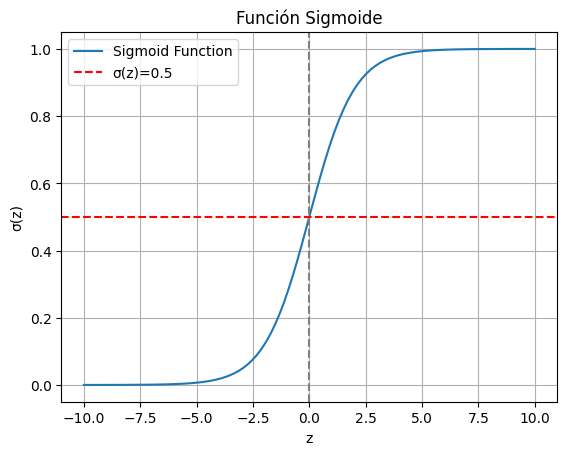

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 100 flotantes equidistantes entre -10 y 10 (para z)
z_values = np.linspace(-10, 10, 100)
# print("z_values", z_values, "\n")

# Calcular valores de la función sigmoide
sigmoid_values = sigmoid(z_values)

# Graficar la función sigmoide
plt.plot(z_values, sigmoid_values, label='Sigmoid Function')
plt.title('Función Sigmoide')
plt.xlabel('z')
plt.ylabel('σ(z)')
plt.grid(True)
plt.axvline(0, color='grey', linestyle='--')
plt.axhline(0.5, color='red', linestyle='--', label='σ(z)=0.5')
plt.legend()
plt.show()

Como se puede observar, la función transforma los valores de $z$ a un rango entre 0 y 1. La línea roja horizontal representa el valor de 0.5, que es el umbral comúnmente utilizado en clasificación binaria para decidir entre las clases. Si $\sigma(z)$ está por encima de 0.5, se clasifica como 1, y si está por debajo, se clasifica como 0.

### 3. **Probabilidad y clasificación**

La regresión logística predice una **probabilidad**.

Al definir un umbral (por ejemplo, 0.5), puedes clasificar los resultados en una clase u otra:

- Si la probabilidad es mayor que 0.5, se clasifica como clase 1 (maligno).
- Si es menor que 0.5, se clasifica como clase 0 (benigno).

### 4. **Función de costo (log loss)**

**¿Por qué NO usar error cuadrático en regresión logística?**

En la **regresión logística**, la función de costo es diferente de la que se usa en la regresión lineal. En lugar de la **suma de los errores cuadrados**, se utiliza una función llamada **log-loss** o **entropía cruzada**. Esta función se ajusta mejor a la naturaleza probabilística de la regresión logística y es esencial para medir el rendimiento del modelo.

En regresión logística, el objetivo es predecir una **probabilidad** entre 0 y 1, y luego tomar decisiones de clasificación en función de esa probabilidad. Si aplicamos la función de error cuadrático, podríamos obtener una curva no convexa, lo que haría difícil encontrar un mínimo global durante el proceso de optimización.

#### 4.1 Log loss o función de pérdida

En lugar de usar la suma de los errores cuadrados como en la regresión lineal, la regresión logística utiliza la **función de pérdida logarítmica** (log loss). Esta función mide la discrepancia entre las probabilidades predichas y las reales:

$$J(\theta) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right]$$


**Explicación de la fórmula**:

- $ m$: Número total de ejemplos en el conjunto de datos.
- $y^{(i)}$: El valor real (etiqueta) del ejemplo \(i\), que es 0 o 1 (binario).
- $h_\theta(x^{(i)})$: Es la probabilidad predicha por el modelo de que $ x^{(i)}$ pertenezca a la clase 1 (maligno en el ejemplo de cáncer de mama).
- $ h_\theta(x) = \sigma(\theta^T x) $, es decir, la **función sigmoide** aplicada a la combinación lineal de las características $x$.

#### Dos casos:
1. **Si $y^{(i)} = 1$**: El término que queda es:

$$- \log(h_\theta(x^{(i)}))$$

Si el modelo predice una probabilidad alta para la clase 1, entonces $ h_\theta(x^{(i)}) $ será cercano a 1, y la pérdida será pequeña (cercana a 0). Pero si $ h_\theta(x^{(i)}) $ es cercano a 0, la pérdida será grande (ya que $ \log(0)$ tiende a $-\infty$ ).

2. **Si $y^{(i)} = 0 $**: El término que queda es:

$$
- \log(1 - h_\theta(x^{(i)}))
$$

En este caso, si el modelo predice correctamente una probabilidad cercana a 0, el valor de $ 1 - h_\theta(x^{(i)}) $ será cercano a 1, y la pérdida será pequeña. Si el modelo predice incorrectamente una probabilidad cercana a 1, la pérdida será grande.

#### 4.2 Interpretación:

- El objetivo del modelo es **minimizar** esta función de costo, lo que se traduce en predecir correctamente las clases asignando probabilidades altas a las clases verdaderas y bajas a las clases incorrectas.
- El costo es bajo cuando las predicciones del modelo son correctas (es decir, cuando predice 1 para ejemplos de clase 1, y 0 para ejemplos de clase 0), y es alto cuando predice incorrectamente.

#### 4.3 Ventajas de la función de costo logarítmica:
- **Convexidad**: La función de costo logarítmica es convexa, lo que garantiza que haya un mínimo global, lo que facilita su optimización usando algoritmos como **gradiente descendente**.
- **Penalización adecuada**: Penaliza más fuertemente los errores graves, lo que significa que si el modelo está muy seguro de una predicción incorrecta, la función de costo lo castigará severamente.

#### 4.4 Ejemplo gráfico
Podrías mostrarles a los estudiantes una gráfica que compare las predicciones del modelo con la función de costo para entender visualmente cómo penaliza los errores:

1. Cuando $ y = 1 $ y el modelo predice una probabilidad baja (cerca de 0), la pérdida es grande.
2. Cuando $ y = 0 $ y el modelo predice una probabilidad alta (cerca de 1), la pérdida también es grande.

### 5. **Regularización en Regresión Logística**

Aprovecha este punto para vincular con **regularización**, que ya han aprendido en otros modelos.



#### 5.1 Regularización L2 (Ridge):

El modelo de regresión logística puede **sobreajustarse** (overfeatting) cuando hay muchas características irrelevantes o ruido en los datos, lo que lleva a predicciones menos precisas. Aquí es donde entra la regularización L2 (también llamada Ridge), que penaliza los coeficientes grandes para evitar sobreajuste:

$$ J(\theta) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right] + \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_j^2
$$

El término adicional $ \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_j^2 $ es la penalización, donde $ \lambda $ controla la cantidad de regularización. Si $ \lambda $ es grande, penaliza más a los coeficientes altos, lo que reduce la complejidad del modelo.



#### 5.2 Regularización L1 (Lasso):

La regularización **L1**,  no solo evita el sobreajuste, sino que puede llevar a una **selección de características** al hacer que algunos coeficientes se vuelvan exactamente cero. Esta forma de regularización agrega el término:

$$
J(\theta) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right] + \frac{\lambda}{m} \sum_{j=1}^{n} |\theta_j|
$$

**L1** fuerza a algunos coeficientes a ser exactamente cero, eliminando así features o variables menos relevantes, lo cual es útil en datasets con muchas variables.


### 6. **Ejemplo de uso**

Usando `sklearn`:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

data = load_breast_cancer()   # cargar datos

In [47]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_gaussian_quantiles

X1, Y1 = make_gaussian_quantiles(n_features=10, n_classes=2, n_samples=1000, random_state=1)
X2, Y2 = make_classification(n_features=10, n_classes=2, n_samples=1000, random_state=1, n_informative=3, n_clusters_per_class=1)

X1.shape

(1000, 10)

In [53]:
X = X1
y = Y1

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo de regresión logística, por defecto usa L2
logreg = LogisticRegression(penalty=None)
logreg.fit(X_train_scaled, y_train)

# Predicción
y_pred_log = logreg.predict(X_test_scaled)

# Evaluación
print(f"- Accuracy Logistic Regression: { accuracy_score(y_test, y_pred_log) }")
print(classification_report(y_test, y_pred_log), "\n")

# Modelo de regresión logística con regularización L2
# 'C' es el inverso de lambda, cuanto más pequeño, mayor es la regularización
logreg_l2 = LogisticRegression(penalty='l2', C=0.1)
logreg_l2.fit(X_train_scaled, y_train)

# Predicción
y_pred_l2 = logreg_l2.predict(X_test_scaled)

# Evaluación
print(f"- Accuracy (L2): { accuracy_score(y_test, y_pred_l2) }")
print(classification_report(y_test, y_pred_l2), "\n")

# Modelo de regresión logística con regularización L1
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)
logreg_l1.fit(X_train_scaled, y_train)

# Predicción
y_pred_l1 = logreg_l1.predict(X_test_scaled)

# Evaluación
print(f"- Accuracy (L1): { accuracy_score(y_test, y_pred_l1) }")
print(classification_report(y_test, y_pred_l1))

- Accuracy Logistic Regression: 0.48
              precision    recall  f1-score   support

           0       0.50      0.38      0.43       156
           1       0.47      0.59      0.52       144

    accuracy                           0.48       300
   macro avg       0.48      0.48      0.48       300
weighted avg       0.48      0.48      0.47       300
 

- Accuracy (L2): 0.48
              precision    recall  f1-score   support

           0       0.50      0.38      0.43       156
           1       0.47      0.59      0.52       144

    accuracy                           0.48       300
   macro avg       0.48      0.48      0.48       300
weighted avg       0.48      0.48      0.47       300
 

- Accuracy (L1): 0.5066666666666667
              precision    recall  f1-score   support

           0       0.53      0.49      0.51       156
           1       0.49      0.53      0.51       144

    accuracy                           0.51       300
   macro avg       0.51      

## **SVM**

### 1. Introducción

SVM es un algoritmo de clasificación que se utiliza para encontrar un **hiperplano óptimo** que separa los datos en diferentes clases. Este hiperplano actúa como una "frontera" que clasifica correctamente a los ejemplos de datos en sus respectivas clases.

### 2. El Hiperplano

Para simplificar, en dos dimensiones (2D), el hiperplano es solo una línea. En más dimensiones, este se convierte en una superficie o plano. La idea detrás de SVM es encontrar el hiperplano que **maximice la distancia** (margen) entre las dos clases, asegurándose de que los puntos más cercanos de ambas clases (llamados **vectores de soporte**) estén lo más lejos posible de este hiperplano.

### 3. Maximización del margen

El margen es la distancia entre el hiperplano y los vectores de soporte. SVM busca maximizar este margen para hacer la clasificación más robusta. Cuanto más grande sea el margen, más confianza tiene el modelo en su clasificación, lo que mejora su capacidad de generalización a nuevos datos.

### 4. Datos no separables linealmente

En muchos casos, los datos no pueden ser separados perfectamente por una línea (o hiperplano) recta. Para resolver este problema, SVM utiliza dos estrategias:
   - **Margen suave (Soft Margin):** Permite que algunos puntos de datos queden mal clasificados si esto ayuda a obtener un margen más grande.
   - **Transformación de características (Kernel):** SVM puede aplicar una transformación a los datos para proyectarlos a un espacio de mayor dimensión, donde un hiperplano puede separar los datos. Esto se logra usando funciones kernel, como el **kernel radial (RBF)** o el **kernel polinomial**.

### 5. Parámetros importantes de `SVC`:

- **C**: Controla la penalización de los errores de clasificación. Un valor bajo de `C` permite que el modelo tenga un margen más amplio pero cometa más errores (generaliza mejor), mientras que un valor alto de `C` penaliza más los errores y hace que el margen sea más ajustado.
- **kernel**: Define el tipo de kernel que transforma los datos en un espacio de mayor dimensión si es necesario. Los más comunes son:
  - `'linear'`: Para datos separables linealmente.
  - `'poly'`: Kernel polinomial.
  - `'rbf'`: Kernel radial, útil para datos que no son linealmente separables.
- **gamma**: Solo para kernels `'rbf'`, `'poly'`, y `'sigmoid'`. Controla cómo de lejos alcanza la influencia de un solo ejemplo de entrenamiento. Valores pequeños implican mayor alcance, mientras que valores grandes lo limitan.


### 6. **Ejemplo visual**

Imagina que tienes dos tipos de puntos en un gráfico 2D: puntos rojos y puntos azules. La tarea es encontrar una línea que divida claramente los dos colores. SVM busca la mejor línea posible que no solo los divida, sino que lo haga maximizando la distancia entre esa línea y los puntos más cercanos de cada color.


Observaremos esta frontera de decisión de SVM con un ejemplo tomado de:

https://scikit-learn.org/stable/auto_examples/svm/plot_linearsvc_support_vectors.html#sphx-glr-auto-examples-svm-plot-linearsvc-support-vectors-py


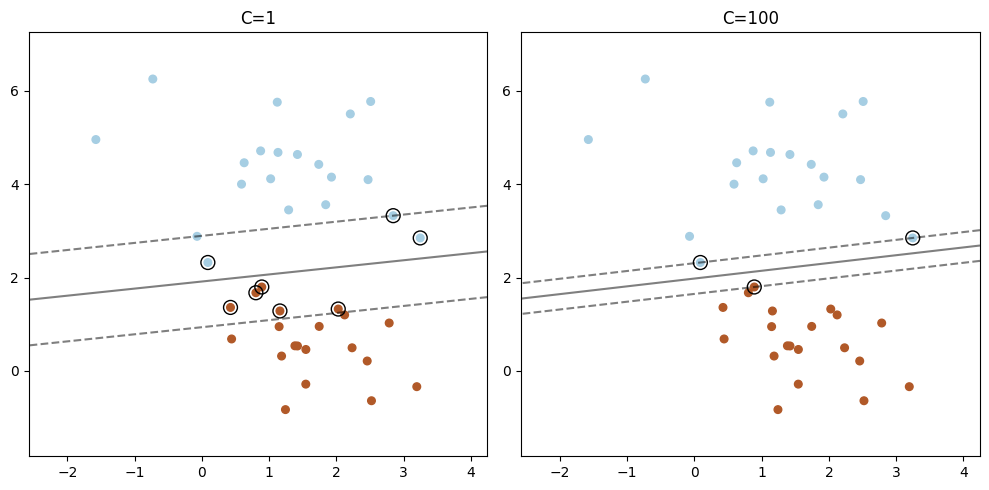

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import LinearSVC

X, y = make_blobs(n_samples=40, centers=2, random_state=0)

plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 100]):
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X, y) # "hinge" is the standard SVM loss
    decision_function = clf.decision_function(X)                  # obtain the support vectors through the decision function

    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    # The support vectors are the samples that lie within the margin
    # boundaries, whose size is conventionally constrained to 1
    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        ax=ax,
        grid_resolution=50,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
    plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.title("C=" + str(C))

plt.tight_layout()
plt.show()

### 7. Ejemplo: diferentes SVMs en el dataset Iris

Ejemplo tomado de:

https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html#sphx-glr-auto-examples-svm-plot-iris-svc-py

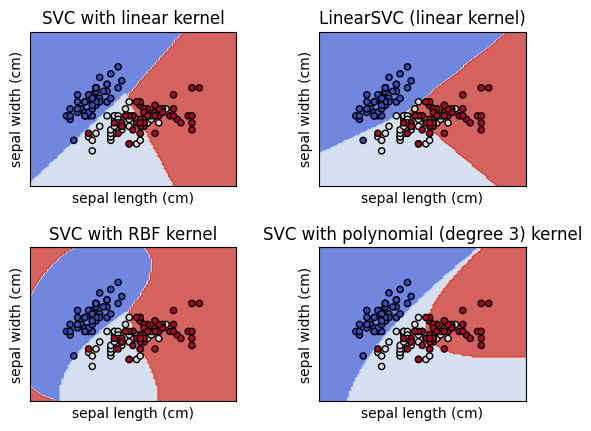

In [56]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

iris = datasets.load_iris()     # import some data to play with

# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data.
# We do not scale our data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

## **Arboles de Decisión**

### 1. Introducción

Los **árboles de decisión** son un tipo de algoritmo de aprendizaje supervisado que se utilizan tanto para problemas de clasificación como de regresión. Son uno de los modelos más intuitivos y fáciles de interpretar, ya que funcionan como una estructura de árbol en la que cada nodo interno representa una **pregunta** sobre una característica, y cada rama representa el resultado de esa pregunta, conduciendo a nodos hijos que a su vez hacen nuevas preguntas o llegan a una predicción final en las **hojas** del árbol.

En este caso, nos enfocaremos en **árboles de decisión para clasificación** usando la implementación de **`DecisionTreeClassifier`** de la librería `sklearn`.

### 2. ¿Cómo funcionan los árboles de decisión?

Los árboles de decisión dividen iterativamente el conjunto de datos en **subconjuntos más homogéneos**, basándose en alguna característica de los datos. Cada división se hace seleccionando la característica que proporciona la mayor **información** o la mejor **reducción de impureza**. Los principales conceptos que utilizan los árboles para dividir los datos incluyen:

- **Gini Impurity**: Es una métrica de la pureza de un nodo. Si todas las instancias en el nodo pertenecen a la misma clase, entonces la impureza de Gini es cero. El árbol selecciona características y umbrales que reducen la impureza.
  
- **Entropía e Información Ganada**: También se puede usar la entropía, que mide el desorden o la incertidumbre de un conjunto de datos. La **información ganada** se calcula como la reducción en la entropía después de una división.

A través de este proceso de división, el árbol sigue ramificándose hasta que se alcanzan condiciones de parada, como un número mínimo de ejemplos en una hoja o una profundidad máxima del árbol.



### 3. Criterios de división

#### 2.1 **Entropía**

La **entropía** es una de las métricas que se utilizan en los árboles de decisión para evaluar la **pureza** o **impureza** de un nodo. Se emplea principalmente cuando el criterio de división del árbol es la **ganancia de información**. La entropía mide la incertidumbre o el desorden en los datos de un nodo y se utiliza para determinar cómo se debe dividir el nodo para obtener subconjuntos más homogéneos.

##### - Fórmula de la Entropía

La fórmula de la **entropía** para un nodo es la siguiente:

$$
H(p) = - \sum_{i=1}^{C} p_i \log_2(p_i)
$$

Donde:
- $ H(p) $ es la entropía del nodo.
- $ C $ es el número de clases posibles (por ejemplo, 2 para clasificación binaria).
- $ p_i $ es la proporción de ejemplos pertenecientes a la clase \(i\) en el nodo.

##### - Explicación de la Fórmula

1. **$ p_i $**: Es la probabilidad (o frecuencia relativa) de que un ejemplo en el nodo pertenezca a la clase $ i $. Para una clase $i$, $p_i$ se calcula como:

   $$
   p_i = \frac{\text{número de ejemplos de la clase } i}{\text{total de ejemplos en el nodo}}
   $$

2. **$ \log_2(p_i) $**: Es la función logarítmica en base 2 aplicada a la probabilidad $ p_i$. La elección de la base 2 asegura que la entropía esté medida en **bits**.

3. **Suma**: La entropía es una suma ponderada de los valores de $ p_i \log_2(p_i) $ para todas las clases. El término negativo asegura que la entropía sea un valor no negativo, ya que $ p_i \log_2(p_i) $ es negativo para $ 0 < p_i < 1 $.

##### - Ejemplos:

* Si todos los ejemplos en un nodo pertenecen a una sola clase, es decir, el nodo es **puro**, la entropía es cero. Esto es porque la incertidumbre es mínima: sabemos con certeza que todos los ejemplos pertenecen a esa clase. En este caso, $ p_i $ sería 1 para una clase y 0 para las demás.
  
  $$
  H(p) = - (1 \log_2(1) + 0 \log_2(0)) = 0
  $$

* Si los ejemplos se dividen equitativamente entre las clases (por ejemplo, en una clasificación binaria, la mitad de los ejemplos pertenecen a una clase y la otra mitad a la otra), la entropía es máxima, porque hay más incertidumbre (el desorden es mayor).

  
$$
  H(p) = -\left( \frac{1}{2} \log_2\left(\frac{1}{2}\right) + \frac{1}{2} \log_2\left(\frac{1}{2}\right) \right) = 1
 $$

##### - Entropía y Árboles de Decisión

El objetivo del árbol de decisión es reducir la entropía en cada división del nodo. Esto se logra seleccionando las características y umbrales que maximizan la **ganancia de información** (es decir, la reducción en entropía). La ganancia de información se calcula como:

$$
\text{Ganancia de información} = H(\text{padre}) - \sum_{\text{hijos}} \frac{n_{\text{hijo}}}{n_{\text{padre}}} H(\text{hijo})
$$

Donde:
- $ H(\text{padre}) $ es la entropía del nodo antes de la división.
- $ H(\text{hijo})$ es la entropía de cada nodo hijo después de la división.
- $ n_{\text{hijo}} $ es el número de ejemplos en el nodo hijo y $ n_{\text{padre}} $ es el número de ejemplos en el nodo padre.

##### Interpretación

- **Mayor ganancia de información** significa que la división resultante tiene subconjuntos más homogéneos (menos desorden, menor entropía).
- **Entropía baja** indica que los datos están organizados de forma más "ordenada" o que la clase predominante en ese nodo es más clara.

Concluyendo, la entropía mide la incertidumbre o el desorden dentro de un conjunto de datos, y los árboles de decisión intentan minimizar esa incertidumbre en cada paso, eligiendo las divisiones que reduzcan la entropía lo máximo posible.


#### 2.2 **Gini**



<< sin contenido >>

### 4. Implementación de Árboles de Decisión con `sklearn`

Para implementar un árbol de decisión en Python, podemos utilizar la clase `DecisionTreeClassifier` de `sklearn`.

A continuación se muestra un ejemplo básico de cómo entrenar un árbol de decisión y hacer predicciones.


In [57]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Cargar el dataset de cáncer de mama
data = load_breast_cancer()
X = data.data
y = data.target

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de Árbol de Decisión
tree = DecisionTreeClassifier(random_state=42)  # criterio Gini de forma predeterminada

# Entrenar el modelo
tree.fit(X_train, y_train)

# Hacer predicciones
y_pred = tree.predict(X_test)

# Evaluar el rendimiento del modelo
print(f"Accuracy: { accuracy_score(y_test, y_pred) }")
print(classification_report(y_test, y_pred))

Accuracy: 0.9415204678362573
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        63
           1       0.97      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



### 5. Parámetros Importantes en Árboles de Decisión

`DecisionTreeClassifier` en `sklearn` permite ajustar varios hiperparámetros que controlan el comportamiento y la complejidad del modelo. A continuación se presentan algunos de los más importantes:

- **`criterion`**: Especifica la métrica utilizada para evaluar la calidad de una división. Los valores comunes son `"gini"` (impureza de Gini) y `"entropy"` (entropía para el cálculo de la información ganada).
  
- **`max_depth`**: Controla la **profundidad máxima** del árbol. Un árbol muy profundo puede ajustarse demasiado a los datos de entrenamiento, lo que provoca un **overfitting**.

- **`min_samples_split`**: El número mínimo de muestras que un nodo debe tener para que se divida. Aumentar este valor puede prevenir que el árbol se ajuste demasiado a los datos de entrenamiento.

- **`min_samples_leaf`**: El número mínimo de muestras que debe tener una hoja. Esto también ayuda a controlar el sobreajuste.

- **`max_features`**: El número máximo de características a considerar al hacer divisiones en cada nodo. Esto puede acelerar el entrenamiento y hacer el modelo más robusto.

### 6. Ventajas y Desventajas de los Árboles de Decisión

**Ventajas**:
- **Fáciles de interpretar**: La estructura de un árbol puede ser visualizada y explicada fácilmente, lo que los hace muy intuitivos.
- **Requieren poca preparación de los datos**: No necesitan que las características estén escaladas o normalizadas, y pueden trabajar con datos categóricos y continuos.
- **No lineales**: Pueden capturar relaciones no lineales entre las características y el target (resultado).

**Desventajas**:
- **Sobreajuste**: Un árbol de decisión sin restricciones puede ser muy profundo y ajustarse demasiado a los datos de entrenamiento, capturando ruido en lugar de patrones reales.
- **Inestabilidad**: Pequeños cambios en los datos pueden generar árboles muy diferentes.
- **Predicciones menos precisas**: En comparación con modelos más complejos (como Random Forests o Boosting), los árboles de decisión individuales pueden no tener tanta capacidad predictiva.

### 7. Visualización del Árbol de Decisión

Una de las grandes ventajas de los árboles de decisión es su capacidad para ser visualizados. Esto es útil tanto para explicar el comportamiento del modelo como para identificar qué características son más importantes para la toma de decisiones.

Podemos usar la función `plot_tree` para visualizar el árbol:


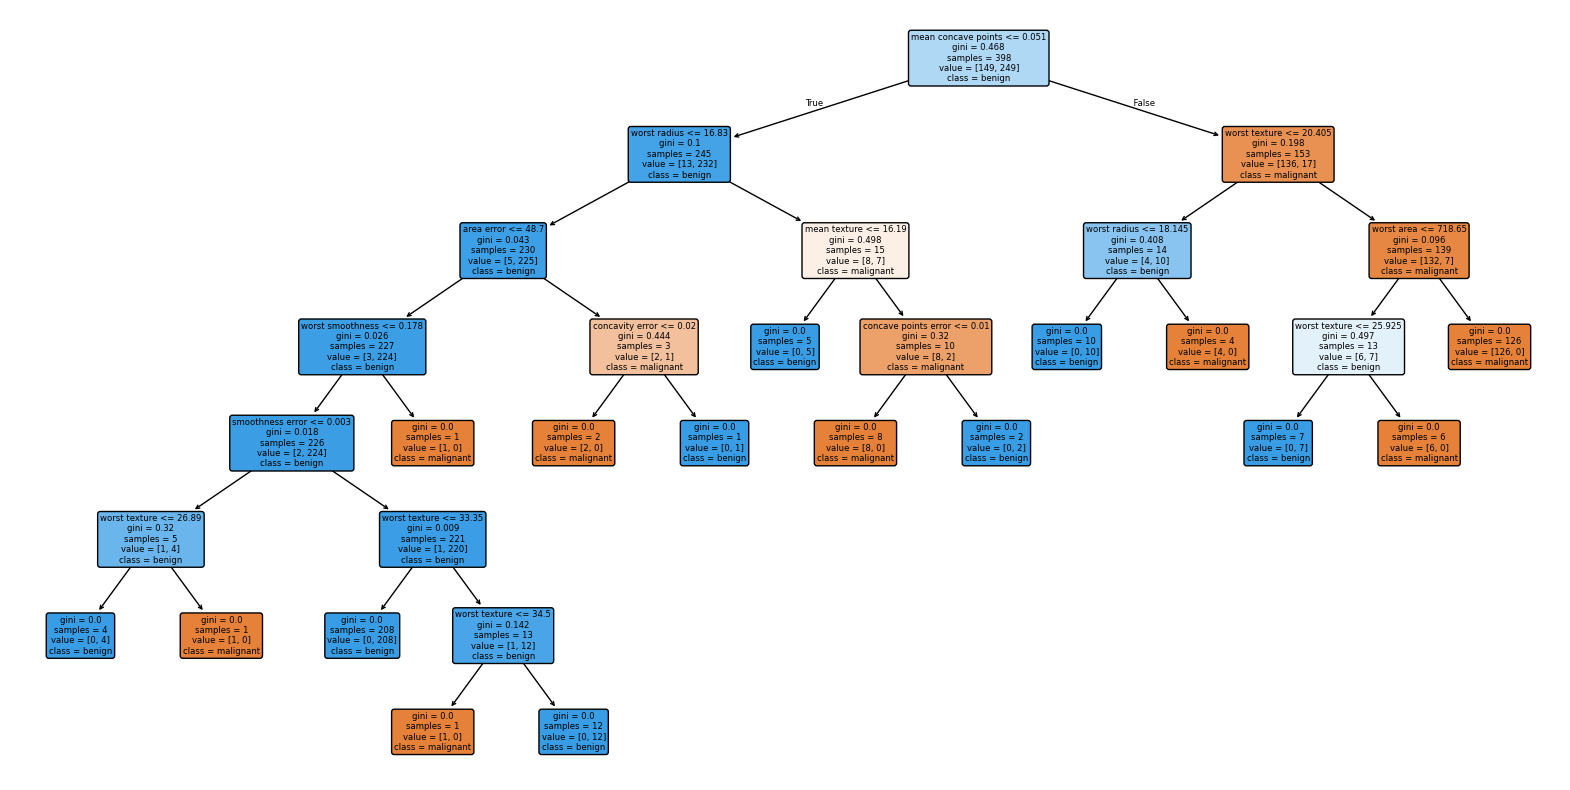

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualizar el árbol de decisión
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=data.feature_names, class_names=data.target_names, rounded=True)
plt.show()

### 8. Árboles de Decisión y Regularización

Para evitar el sobreajuste, los árboles de decisión deben ser regularizados. Existen varias formas de regularizar un árbol:

- **Limitar la profundidad del árbol** (`max_depth`).
- **Aumentar el número mínimo de muestras por nodo** (`min_samples_split`, `min_samples_leaf`).
- **Pruning**: Aunque no está implementado directamente en `sklearn`, el **poda de árboles** es una técnica que reduce el tamaño del árbol eliminando ramas que no tienen un impacto significativo en la predicción final.



## **KNN**

### 1. Introducción al Modelo K-Nearest Neighbors (KNN)

El modelo **K-Nearest Neighbors (KNN)** es un algoritmo de **aprendizaje supervisado** utilizado para problemas de clasificación y regresión.

En el caso de clasificación, KNN es uno de los modelos más simples y efectivos cuando se tienen datos bien distribuidos. Es particularmente útil cuando no se quiere hacer ninguna suposición sobre la distribución subyacente de los datos, ya que se basa en la proximidad de las observaciones entre sí.

### 2. ¿Cómo Funciona KNN?

El principio básico de KNN es bastante sencillo: para clasificar una nueva observación, el algoritmo busca los **k vecinos más cercanos** en el conjunto de datos de entrenamiento y asigna la clase más común entre esos vecinos a la nueva observación. En otras palabras, KNN clasifica un nuevo punto basándose en las clases de los puntos de entrenamiento más cercanos a él.

### 3. Proceso de Clasificación con KNN:

3.1. **Selección del parámetro $k$**:
   - El primer paso es elegir el número de vecinos $k$ que considerará el modelo. Este es un hiperparámetro importante que debe ser ajustado dependiendo del conjunto de datos.
   - Un valor pequeño de $k$ puede hacer que el modelo sea más sensible al ruido (sobreajuste), mientras que un valor demasiado grande de $k$ puede hacer que el modelo no capte bien las relaciones locales (subajuste).

3.2. **Medición de la distancia**:

- KNN clasifica las nuevas instancias según su **distancia** a las instancias en el conjunto de datos de entrenamiento. Las distancias más comunes utilizadas son:

  - **Distancia Euclidiana** (la más común):
$$
d(p, q) = \sqrt{ \sum_{i=1}^{n} (p_i - q_i)^2 }
$$

  - **Distancia Manhattan** (suma de valores absolutos):
$$
d(p, q) = \sum_{i=1}^{n} |p_i - q_i|
$$

  - **Distancia de Minkowski**: Es una generalización de las anteriores.


3.3. **Búsqueda de los k vecinos más cercanos**:

- Una vez seleccionada la métrica de distancia, KNN encuentra los **k puntos de entrenamiento** que están más cerca de la nueva instancia.

3.4. **Asignación de clase**:

- Después de identificar los $k$ vecinos más cercanos, el algoritmo cuenta cuántos vecinos pertenecen a cada clase.

- La clase que tiene **mayoría** entre los vecinos más cercanos se asigna como la clase de la nueva instancia.

### 4. Ejemplo Intuitivo:

Imagina que tienes un gráfico con puntos representando dos clases, digamos, círculos azules y triángulos rojos.

Si quieres clasificar un nuevo punto que no tiene etiqueta, el algoritmo KNN busca los $k$ puntos más cercanos a él. Si la mayoría de esos puntos son círculos azules, el nuevo punto será clasificado como círculo azul; si la mayoría son triángulos rojos, el nuevo punto será clasificado como triángulo rojo.

### 5. Parámetros Importantes de KNN

1. **Número de vecinos (k)**:
   - Es el parámetro más importante. Un $k$ pequeño puede llevar a sobreajuste (ya que puede captar ruido en los datos), mientras que un $k$ grande puede causar subajuste (perder información local).

2. **Métrica de distancia**:
   - La métrica utilizada para medir la cercanía entre los puntos puede influir en el rendimiento del algoritmo. La distancia euclidiana es común, pero otras distancias pueden ser útiles dependiendo de la naturaleza de los datos.

3. **Ponderación de los vecinos**:
   - Se puede ponderar a los vecinos según la distancia. Por ejemplo, se puede dar mayor peso a los vecinos más cercanos, en lugar de simplemente contar cuántos vecinos pertenecen a cada clase. Esto se conoce como **KNN ponderado**.

### 6. Ventajas de KNN

1. **Simplicidad**: KNN es uno de los algoritmos más simples de entender e implementar. No requiere entrenamiento complejo, ya que simplemente almacena el conjunto de datos de entrenamiento.
  
2. **No paramétrico**: KNN no asume ninguna suposición sobre la distribución subyacente de los datos, lo que lo hace flexible para una gran variedad de problemas.

3. **Buena para datos pequeños**: En conjuntos de datos pequeños y con buena separación entre clases, KNN puede funcionar de manera excelente.

### 7. Desventajas de KNN

1. **Costo computacional**: A medida que crece el tamaño del conjunto de datos, el algoritmo puede volverse **lento** debido a que debe calcular las distancias para cada punto de prueba contra cada punto de entrenamiento.

2. **Sensibilidad a la escala**: Como KNN utiliza distancias, es sensible a la escala de los datos. Si una característica tiene valores mucho más grandes que otras, dominará las distancias. Por eso, es importante **escalar** o **normalizar** las características antes de usar KNN.

3. **Sensibilidad al ruido**: KNN puede verse afectado por datos atípicos o ruido, ya que puede considerar estos puntos como vecinos cercanos y, por lo tanto, tomar decisiones incorrectas.


### 8. Implementación de KNN en Python

A continuación, te muestro cómo implementar un modelo KNN en Python utilizando la librería `sklearn`:


In [58]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Cargar el dataset Iris
data = load_iris()
X = data.data
y = data.target

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo KNN con k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Entrenar el modelo
knn.fit(X_train, y_train)

# Hacer predicciones
y_pred = knn.predict(X_test)

# Evaluar el rendimiento del modelo
print(f"Accuracy: { accuracy_score(y_test, y_pred) }")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



#### 8.1. Interpretación del Código

1. **Carga del dataset**: Se utiliza el conjunto de datos `Iris` para este ejemplo.
2. **División de los datos**: Se dividen los datos en conjuntos de entrenamiento y prueba.
3. **Creación del modelo KNN**: Se define un modelo con $ k = 3 $, lo que significa que el algoritmo utilizará los 3 vecinos más cercanos para hacer predicciones.
4. **Entrenamiento**: El modelo se entrena con los datos de entrenamiento.
5. **Predicción**: El modelo hace predicciones sobre el conjunto de prueba.
6. **Evaluación**: Se evalúa la precisión y otras métricas del modelo.

### 9. Conclusión

El modelo K-Nearest Neighbors (KNN) es un enfoque simple y eficaz para tareas de clasificación que se basa en la proximidad de los puntos de datos. Aunque tiene limitaciones en términos de rendimiento y sensibilidad al ruido, es una excelente opción para problemas donde se espera que las instancias cercanas compartan la misma clase. La elección adecuada del valor de $ k $ y la normalización de las características son aspectos clave para lograr buenos resultados con este modelo.

# **Ejemplos**

https://scikit-learn.org/stable/auto_examples/classification/plot_classification_probability.html#sphx-glr-auto-examples-classification-plot-classification-probability-py


## Distintos clasificadores + Frontera de Decisión


In [75]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

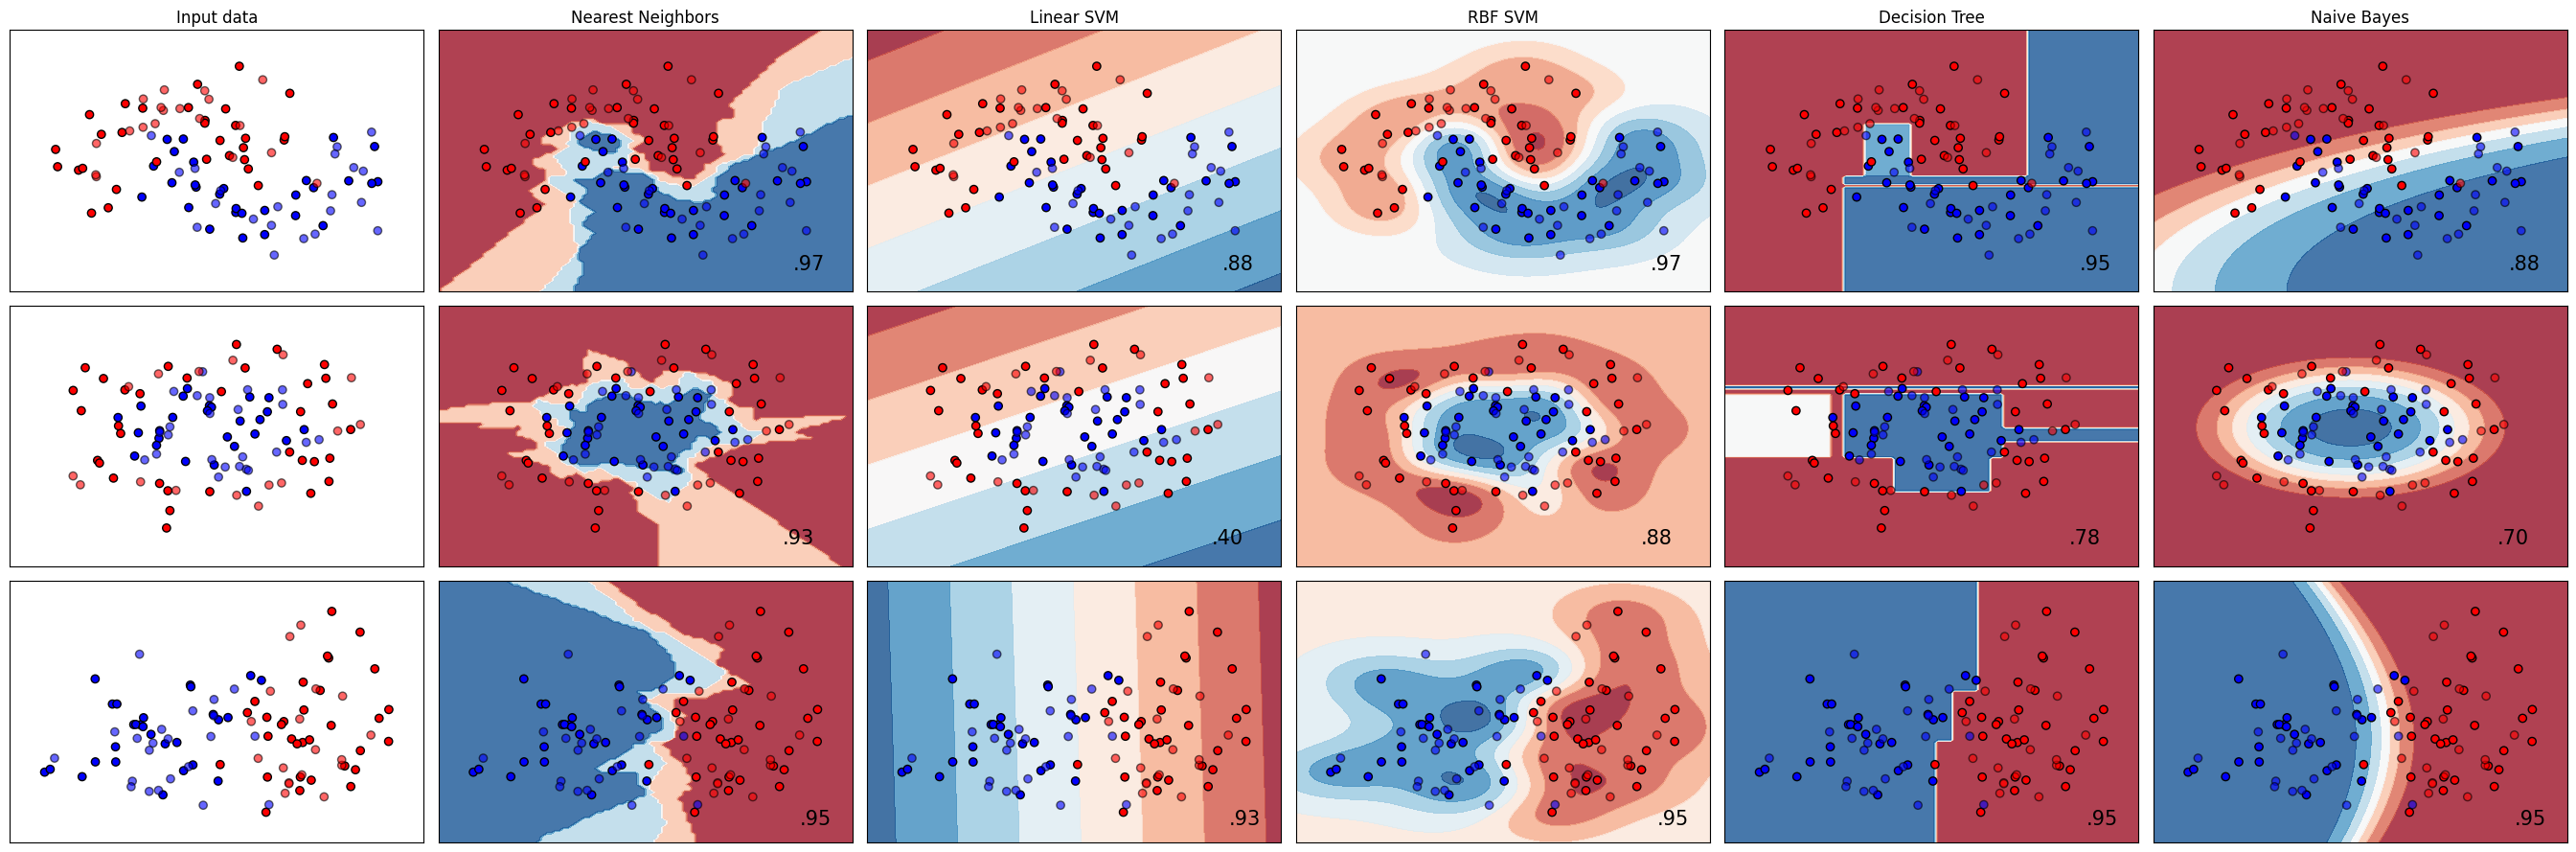

In [83]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Decision Tree",
    "Naive Bayes"
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    GaussianNB()
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)

rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1

for ds_idx, ds in enumerate(datasets):  # iterate over datasets

    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_idx == 0: ax.set_title("Input data")

    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")         # plot the training points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k") # plot the testing points
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5)

        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")           # plot the training points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors="k", alpha=0.6 )  # plot the testing points
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_idx == 0: ax.set_title(name)
        ax.text(x_max - 0.3, y_min + 0.3, ("%.2f" % score).lstrip("0"), size=15, horizontalalignment="right")
        i += 1

plt.tight_layout()
plt.show()

## Caso: dataset 'breast-cancer'

In [60]:
# importar librerías necesarias
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

In [63]:
# cargar del dataset
data = load_breast_cancer()

X = data.data
y = data.target

X.shape

(569, 30)

In [64]:
# dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [65]:
# Feature engineering

# estandarizar las características para algunos modelos (Logistic Regression, SVM, KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
# Caso 1. Regresión Logística
logreg = LogisticRegression(penalty=None)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

# matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_logreg)

print("Logistic Regression")
print(f"Accuracy: { accuracy_score(y_test, y_pred_logreg) }")
print(classification_report(y_test, y_pred_logreg))

print("Matriz de confusión:")
print(conf_matrix)

Logistic Regression
Accuracy: 0.9590643274853801
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        63
           1       0.98      0.95      0.97       108

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

Matriz de confusión:
[[ 61   2]
 [  5 103]]


In [70]:
# Caso 2. Regresión Logística (sin penalty)
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

# matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_logreg)

print("Logistic Regression")
print(f"Accuracy: { accuracy_score(y_test, y_pred_logreg) }")
print(classification_report(y_test, y_pred_logreg))

print("Matriz de confusión:")
print(conf_matrix)

Logistic Regression
Accuracy: 0.9824561403508771
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

Matriz de confusión:
[[ 62   1]
 [  2 106]]


In [71]:
# Caso 3. Support Vector Machine
svm = SVC()
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

print("Support Vector Machine")
print(f"Accuracy: { accuracy_score(y_test, y_pred_svm) }")
print(classification_report(y_test, y_pred_svm))

Support Vector Machine
Accuracy: 0.9766081871345029
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [72]:
# Caso 4. Árbol de decisión
tree = DecisionTreeClassifier(random_state=3)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("Decision Tree")
print(f"Accuracy: { accuracy_score(y_test, y_pred_tree) }")
print(classification_report(y_test, y_pred_tree))

Decision Tree
Accuracy: 0.9298245614035088
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        63
           1       0.97      0.92      0.94       108

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



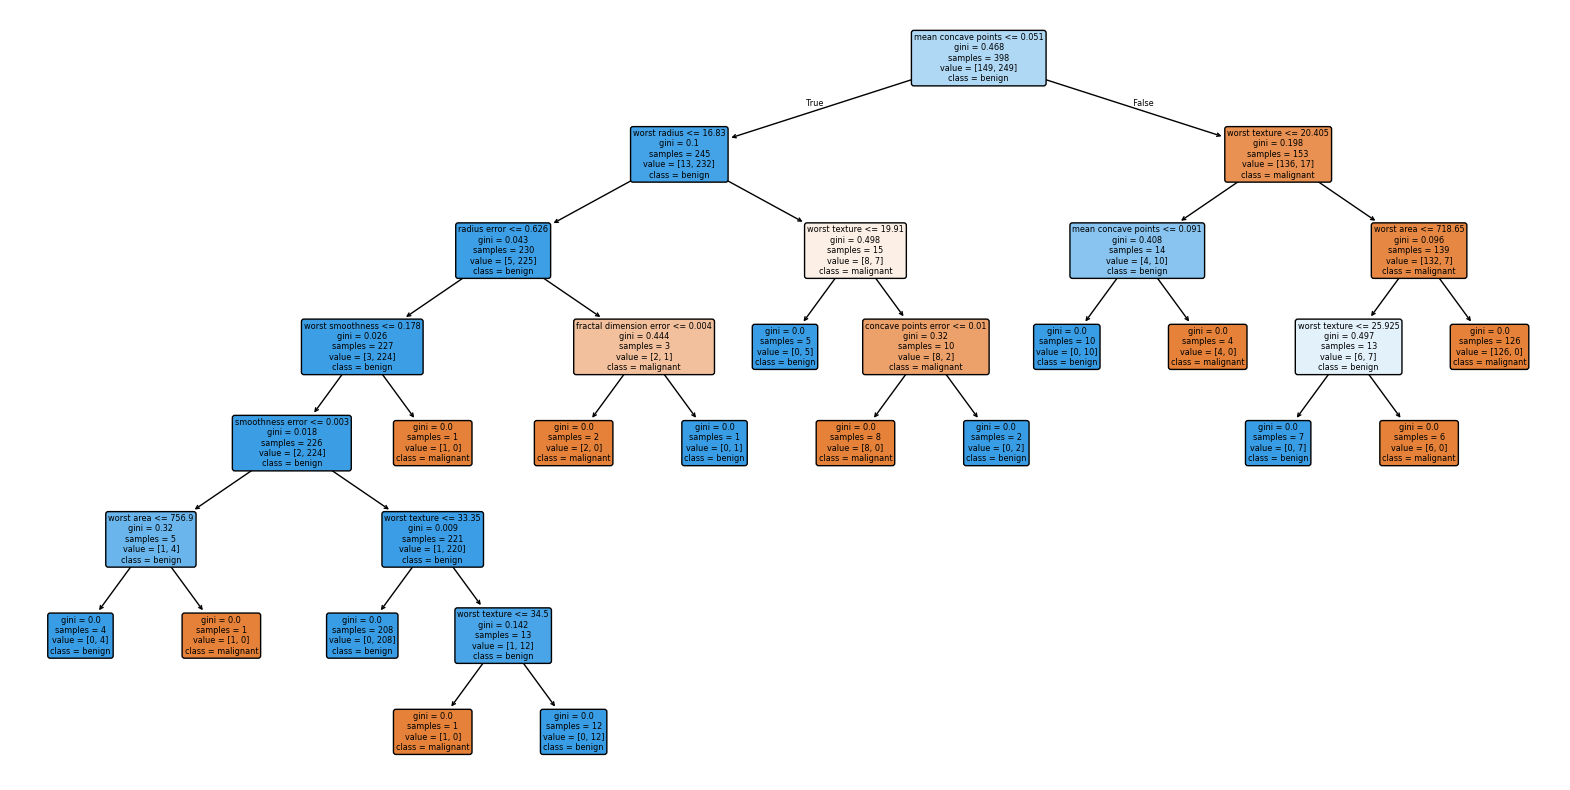

In [ ]:
# visualización del Árbol de Decisión
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=data.feature_names, class_names=data.target_names, rounded=True)
plt.show()

In [73]:
# Caso 5. K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("K-Nearest Neighbors")
print(f"Accuracy: { accuracy_score(y_test, y_pred_knn) }")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors
Accuracy: 0.9590643274853801
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



## Caso: dataset 'dígitos'


Evaluación de ejemplo de clasificación con SVM

https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py